# One-Hot Encoding ve Label Encoding:Kategorik Verileri Dönüştürme

** encoding-->kodlama

 One-Hot encoding ve Label encoding, makine öğrenmesi modellerinde kategorik verileri sayısal değerelere dönüştürmek için kullanılan iki önemli tekniktir.Çoğu makine öğrenmesi algoritması sayısal veriler ile çalıştığından,kategorik verileri(cinsiyet,şehir,renk vs) sayısal formata dönüştürmek gerekir

 ## Label Encoding

 Label Encoding, her bir kategoriyi benzersiz bir tam sayıya dönüştürür

 ### Nasıl Çalışır

 ** Her bir benzersiz kategoriye sıralı bir sayı atanır(genelde 0 dan başlar)
 ** Örnek olarak: Kırmızı-->0 , Mavi-->1, Yeşil-->2

### Avantajları

** Basit ve kolay uygulanır
** Veri boyutunu önemli ölçüde arttırmaz
** Sıralı kategorik değişkenler(anlamlı bir sıraya sahip) için uygundur
** Bir kolonda True-False değerleri varsa one hot yerine label encoding uygulanır

### Dezavantajları

** Sayısal değerler arasında matematiksel bir ilişki yaratır
** Bu matematiksel ilişki,sıralı olmayan kategoriler için modeli yanıltır


## One-Hot Encoding

One-Hot encoding, her bir kategori değerini binary(0-1) vektörlere dönüştürür.Her bir kategori için yeni bir sutun oluşturur

### Nasıl Çalışır

* Her benzersiz kategori için yeni bir sutun oluşturulur
* Veri o kategoriye aitse 1, değilse 0 değeri atanır
* Örnek: Kırmızı-->[1,0,0], Mavi-->[0,1,0], Yeşil-->[0,0,1]

### Avantajları

* Kategoriler arasında matematiksel bir hiyerarşi oluşturmaz
* Nominal(sırasız) kategorik veriler için idealdir

### Dezavantajları

* Çok sayıda yeni sütün oluşturduğu için boyut arttırır
* Çok fazla kategori olduğunda bellek kulanımdan sorun yaratabilir
* Sıralı veriler için bilgi kaynı yaratır



## Ne Zaman Hangisi Kullanılmalı?

### Label Encoding şu durumalarda tercih edilir:

* Kategoriler arasında doğal bir sıralama var ise(Küçük-Orta-Büyük)
* Karar ağaçları gibi sıralama özelliğini dikkate alabilen algoritmalar kullanılıyorsa
* Çok fazla kategori var ise ve bellek(performans) kullanımı önemliyse

### One-Hot Encoding şu durumlarda tercih edilir:

* Kategoriler arasında sıralama yok ise(Kırmızı-Yeşil-Mavi)
* Lineer regresyon,Lojistik regresyon, sinir ağları gibi algoritmalar kullanılıyorsa

## Örnek

Bir banka müşterilerinin kredi risk skorunu tahmin etmek için makine öğrenmesi modeli geliştiriliyor.Veri setindeki özellikler şunlardır:

* Yaş--> 25,30,45 vb(sayısal)
* Maaş--> 5000,8000,12000 vb(sayısal)
* Eğitim seviyesi--> İlkokul-Lise-Üni-Yüksek Lisans(sıralı kategorik)
* Şehir--> İstanbul,Ankara,İzmir vb(nominal kategorik)
* Medeni durum--> Bekar,Evli,Boşanmış(nominal kategorik)

### Label Encoding kullanımı

Eğitim seviyesi için label encoding kullanmak uygun çünkü seviyeler arasında doğal bir sıralama vardır.Model bu sıralamayı dikkate alır

* İlkokul-->0
* Lise-->1
* Üniversite-->2
* Yüksek Lisans-->3

### One-Hot Encoding kullanımı

Şehir ve medeni durum için One-Hot encoding kullanılır.Bu kategoriler arassında doğal bir sıralama yoktur

Şehir için:

* İstanbul-->[1,0,0]
* Ankara-->[0,1,0]
* İzmir-->[0,0,1]

Medeni durum için:

* Bekar-->[1,0,0]
* Evli-->[0,1,0]
* Boşanmış-->[0,0,1]

En doğru yaklaşım veri setinin özelliklerine ve kullanacağım algoritmalara göre encoding yöntemini seçmektir.Mesela eğer Linear Regresyon kullanacaksak Label Encoding ile İstanbul(0),Ankara(1) ve İzmir(2) arasında matematiksel bir ilişki kurulacaktır. Model İzmirin Ankaradan 1 birim İstanbuldan 2 birim büyük olduğunu düşünebilir. Bu mantıksızdır.Böyle bir durumda One-Hot Encoding kullanılır.Eğer Decision Tree ya da Random Forest kullanacaksak bu algoritmalar bölümleme yaptığından sıralama önemli değildir ve Label Encoding yeterli olaiblir.Bu algoritmalar "Şehir≤1"gibi bölünmeler yapar ve bu durumda İstanbul ve Ankara bir grupta, İzmir diğer grupta olur





## Label Encoding ve One-Hot Encoding: Gerçek Hayat Örneği ve Kod Uygulaması

Bir ev fiyat tahmin modeli oluşturmak için veri seti üzerinde Label Encoding ve One-Hot Encoding teknikleri uygulayacaz.Hem sıralı hem de nominal kategorik değişkenler kullanacaz

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer #sutunlara farklı dönüşümler uygular
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
import warnings
warnings.filterwarnings("ignore")


In [83]:
#Veri setini oluştur -Ev fiyat verileri
np.random.seed(31)

#Örneklerin sayısı
n_samples=300

#Veri seti oluşturma
data={"metrekare":np.random.randint(60,250,n_samples),
      "oda_sayisi":np.random.randint(1,6,n_samples),
      "bina_yasi":np.random.randint(0,40,n_samples),
      
      #Kategorik değişkenler
      "semt":np.random.choice(["Kadıköy","Üsküdar","Beşiktaş","Şişli","Maltepe"],n_samples),
      "ısıtma_tipi":np.random.choice(["Doğalgaz","Merkezi","Soba","Klima"],n_samples),
      "zeminin_deprem_durumu":np.random.choice(["Kötü","Orta","İyi","Çok İyi"],n_samples)}

#Df oluşturma
df=pd.DataFrame(data)
df.head(3)

,metrekare,oda_sayisi,bina_yasi,semt,ısıtma_tipi,zeminin_deprem_durumu
0,147,3,6,Maltepe,Doğalgaz,İyi
1,76,3,16,Şişli,Doğalgaz,İyi
2,186,3,6,Kadıköy,Doğalgaz,Orta


In [84]:
#Fiyat(target variable) oluşturma
#Semtin fiyata etkisi(sırasız kategorik değişken)
semt_etki={"Kadıköy":300000,
           "Beşiktaş":500000,
           "Şişli":400000,
           "Üsküdar":200000,
           "Maltepe":250000}

#Isıtma tipinin fiyata etkisi(sırasız kategorik değişken)
ısıtma_etki={"Doğalgaz":60000,
             "Merkezi":95000,
             "Klima":0,
             "Soba":-100000}

#Zeminin deprem durumunun fiyata etkisi(sıralı kategorik değişken)
durum_etki={"Kötü":-100000,
            "Orta":10000,
            "İyi":200000,
            "Çok İyi":500000}

#Fiyat Hesabı
df["fiyat"]=(df["metrekare"]*5000 +
             df["oda_sayisi"]*50000 -
             df["bina_yasi"]*10000 +
             df["semt"].map(semt_etki) +
             df["ısıtma_tipi"].map(ısıtma_etki) +
             df["zeminin_deprem_durumu"].map(durum_etki) +
             np.random.normal(0,50000,n_samples)#Rastgelelik ekle      
             )

#İlk 5 satır
df.head()

,metrekare,oda_sayisi,bina_yasi,semt,ısıtma_tipi,zeminin_deprem_durumu,fiyat
0,147,3,6,Maltepe,Doğalgaz,İyi,"1,312,001"
1,76,3,16,Şişli,Doğalgaz,İyi,"943,369"
2,186,3,6,Kadıköy,Doğalgaz,Orta,"1,397,374"
3,158,2,34,Üsküdar,Merkezi,Kötü,"700,343"
4,211,1,2,Maltepe,Merkezi,Orta,"1,477,500"


In [85]:
#Veri seti yapısı
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   metrekare              300 non-null    int64  
 1   oda_sayisi             300 non-null    int64  
 2   bina_yasi              300 non-null    int64  
 3   semt                   300 non-null    object 
 4   ısıtma_tipi            300 non-null    object 
 5   zeminin_deprem_durumu  300 non-null    object 
 6   fiyat                  300 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.5+ KB


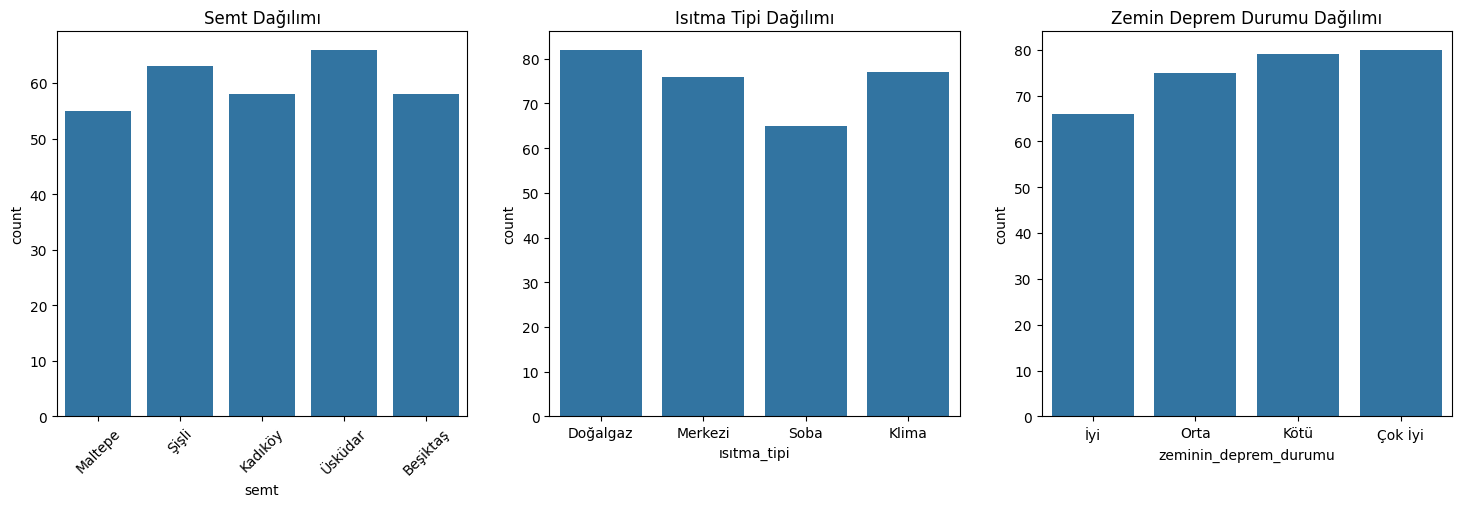

In [86]:
#Kategorik değişkenlerin dağılımını incele
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.countplot(x="semt",data=df,ax=axes[0])
axes[0].set_title("Semt Dağılımı")
axes[0].tick_params(axis="x",rotation=45)

sns.countplot(x="ısıtma_tipi",data=df,ax=axes[1])
axes[1].set_title("Isıtma Tipi Dağılımı")

sns.countplot(x="zeminin_deprem_durumu",data=df,ax=axes[2])
axes[2].set_title("Zemin Deprem Durumu Dağılımı")

plt.show()

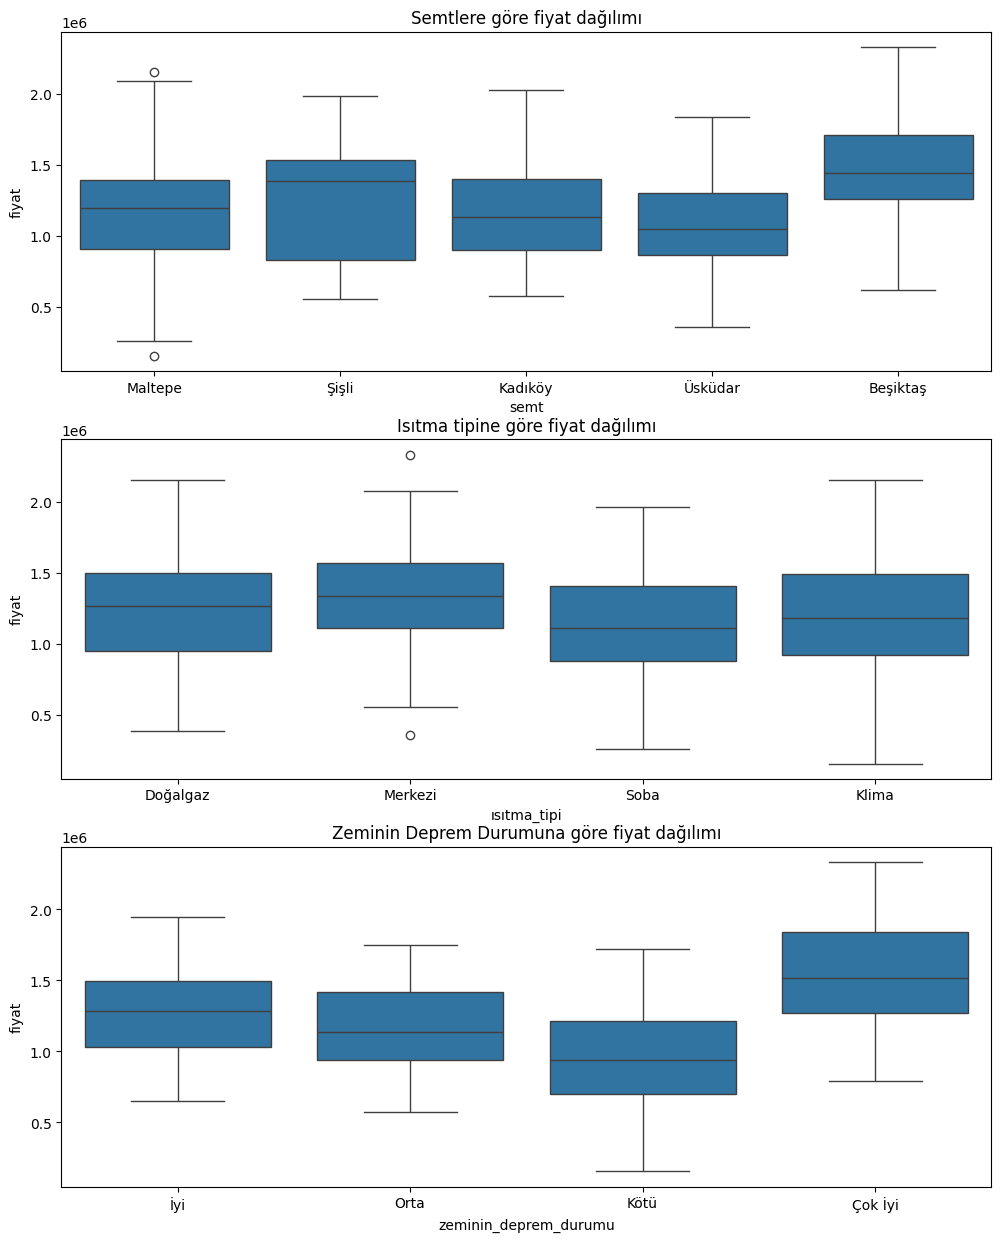

In [87]:
#Kategorik Değişkenlerin Fiyat ile İlişkileri
fig,axes=plt.subplots(3,1,figsize=(12,15))

sns.boxplot(x="semt",y="fiyat",data=df,ax=axes[0])#Beşiktaş en pahalı
axes[0].set_title("Semtlere göre fiyat dağılımı")

sns.boxplot(x="ısıtma_tipi",y="fiyat",data=df,ax=axes[1])
axes[1].set_title("Isıtma tipine göre fiyat dağılımı")#Sobalı evin fiyatı düşük

sns.boxplot(x="zeminin_deprem_durumu",y="fiyat",data=df,ax=axes[2])
axes[2].set_title("Zeminin Deprem Durumuna göre fiyat dağılımı")

plt.show()

In [88]:
#Farklı encoding yöntemlerini karşılaştır
print("=== Label Encoding Uygulaması ===")

#Label Encoding için kopya oluştur
df_label=df.copy()

#LabelEncoder nesneleri oluştur
le_semt=LabelEncoder()
le_ısıtma=LabelEncoder()
le_durum=LabelEncoder()

#Label Encoding uygulama
df_label["semt_encoded"]=le_semt.fit_transform(df_label["semt"])
df_label["ısıtma_tipi_encoded"]=le_ısıtma.fit_transform(df_label["ısıtma_tipi"])
df_label["zeminin_deprem_durumu_encoded"]=le_durum.fit_transform(df_label["zeminin_deprem_durumu"])

=== Label Encoding Uygulaması ===


In [89]:
#Dönüşümleri yazdır
print("Label Encoding Sonuçları:")
print("Semt Encoding:",dict(zip(le_semt.classes_,le_semt.transform(le_semt.classes_))))
print("Isıtma Tipi Encoding:",dict(zip(le_ısıtma.classes_,le_ısıtma.transform(le_ısıtma.classes_))))
print("Zeminin Deprem Durumu Encoding:",dict(zip(le_durum.classes_,le_durum.transform(le_durum.classes_))))

Label Encoding Sonuçları:
Semt Encoding: {'Beşiktaş': np.int64(0), 'Kadıköy': np.int64(1), 'Maltepe': np.int64(2), 'Üsküdar': np.int64(3), 'Şişli': np.int64(4)}
Isıtma Tipi Encoding: {'Doğalgaz': np.int64(0), 'Klima': np.int64(1), 'Merkezi': np.int64(2), 'Soba': np.int64(3)}
Zeminin Deprem Durumu Encoding: {'Kötü': np.int64(0), 'Orta': np.int64(1), 'Çok İyi': np.int64(2), 'İyi': np.int64(3)}


In [90]:
#Label Encoding Sonuçları
df_label.head()

,metrekare,oda_sayisi,bina_yasi,semt,ısıtma_tipi,zeminin_deprem_durumu,fiyat,semt_encoded,ısıtma_tipi_encoded,zeminin_deprem_durumu_encoded
0,147,3,6,Maltepe,Doğalgaz,İyi,"1,312,001",2,0,3
1,76,3,16,Şişli,Doğalgaz,İyi,"943,369",4,0,3
2,186,3,6,Kadıköy,Doğalgaz,Orta,"1,397,374",1,0,1
3,158,2,34,Üsküdar,Merkezi,Kötü,"700,343",3,2,0
4,211,1,2,Maltepe,Merkezi,Orta,"1,477,500",2,2,1


In [91]:
print("=== One-Hot Encoding Uygulaması ===")
#One-hot encoding için kopya oluştur
df_onehot=df.copy()

#One-Hot Encoding Uygulama
#Pandas get_dummies fonksiyonu ile
df_onehot=pd.get_dummies(df_onehot,columns=["semt","ısıtma_tipi"],prefix=["semt","ısıtma tipi"],dtype="int")

#Zeminin deprem durumu siralı olduğu içim Label Encoding uygula
df_onehot["zeminin_deprem_durumu_encoded"]=le_durum.fit_transform(df_onehot["zeminin_deprem_durumu"])

print("One-Hot Encdoing Sonrası Veri")
df_onehot.head()


=== One-Hot Encoding Uygulaması ===
One-Hot Encdoing Sonrası Veri


,metrekare,oda_sayisi,bina_yasi,zeminin_deprem_durumu,fiyat,semt_Beşiktaş,semt_Kadıköy,semt_Maltepe,semt_Üsküdar,semt_Şişli,ısıtma tipi_Doğalgaz,ısıtma tipi_Klima,ısıtma tipi_Merkezi,ısıtma tipi_Soba,zeminin_deprem_durumu_encoded
0,147,3,6,İyi,"1,312,001",0,0,1,0,0,1,0,0,0,3
1,76,3,16,İyi,"943,369",0,0,0,0,1,1,0,0,0,3
2,186,3,6,Orta,"1,397,374",0,1,0,0,0,1,0,0,0,1
3,158,2,34,Kötü,"700,343",0,0,0,1,0,0,0,1,0,0
4,211,1,2,Orta,"1,477,500",0,0,1,0,0,0,0,1,0,1


In [92]:
#Veri setini eğitim ve test olarak ayır
X_label=df_label[["metrekare","oda_sayisi","bina_yasi","semt_encoded","ısıtma_tipi_encoded","zeminin_deprem_durumu_encoded"]]
X_onehot=df_onehot.drop(["fiyat","zeminin_deprem_durumu"],axis=1)
y=df["fiyat"]

X_label_train,X_label_test,y_label_train,y_label_test=train_test_split(X_label,y,test_size=0.3,random_state=31)
X_onehot_train,X_onehot_test,y_onehot_train,y_onehot_test=train_test_split(X_onehot,y,test_size=0.3,random_state=31)

In [93]:
#İki farklı modeli eğit -Doğrusal Regresyon-
print(" === Doğrusal Regresyon Modelleri === ")
# Label Encoding ile Doğrusal Regresyon
lr_label=LinearRegression()
lr_label.fit(X_label_train,y_label_train)
lr_label_pred=lr_label.predict(X_label_test)
lr_label_rmse=np.sqrt(mean_squared_error(y_label_test,lr_label_pred))
print(f"Label Encoding + Doğrusal Regresyon RMSE: {lr_label_rmse:.2f}")


# One-Hot Encoding ile Doğrusal Regresyon
lr_onehot=LinearRegression()
lr_onehot.fit(X_onehot_train,y_onehot_train)
lr_onehot_pred=lr_onehot.predict(X_onehot_test)
lr_onehot_rmse=np.sqrt(mean_squared_error(y_onehot_test,lr_onehot_pred))
print(f"One-Hot Encoding + Doğrusal Regresyon RMSE: {lr_onehot_rmse:.2f}")

 === Doğrusal Regresyon Modelleri === 
Label Encoding + Doğrusal Regresyon RMSE: 230764.39
One-Hot Encoding + Doğrusal Regresyon RMSE: 190675.10


In [94]:
# Karar Ağacı Regresyon modelleri
print(" === Karar Ağacı Regresyon Modelleri === ")

# Label Encoding ile Karar Ağacı
dt_label=DecisionTreeRegressor(random_state=31)
dt_label.fit(X_label_train,y_label_train)
dt_label_predict=dt_label.predict(X_label_test)
dt_label_rmse=np.sqrt(mean_squared_error(y_label_test,dt_label_predict))
print(f"Label Encoding + Karar Ağacı RMSE: {dt_label_rmse:.2f}")

#One-Hot Encoding ile Karar Ağacı
dt_onehot=DecisionTreeRegressor(random_state=31)
dt_onehot.fit(X_onehot_train,y_onehot_train)
dt_onehot_pred=dt_onehot.predict(X_onehot_test)
dt_onehot_rmse=np.sqrt(mean_squared_error(y_onehot_test,dt_onehot_pred))
print(f"One-Hot Encoding + Karar Ağacı RMSE: {dt_onehot_rmse:.2f}")

 === Karar Ağacı Regresyon Modelleri === 
Label Encoding + Karar Ağacı RMSE: 254542.26
One-Hot Encoding + Karar Ağacı RMSE: 233046.33


In [95]:
#Doğrusal Regresyon için özellik önemleri
print(" === Doğrusal Regresyon Özellik Önemleri === ")
#Label Encoding ile özellik önemleri
print("Label Encoding ile özellik önemleri:")
lr_label_features=pd.DataFrame({"Feature":X_label.columns,
                                "Coefficient":lr_label.coef_})
print(lr_label_features.sort_values("Coefficient",ascending=False))

print("=="*31)

#One-Hot Encoding ile Özellik önemleri
print("One-Hot Encoding ile Özellik Önemleri")
lr_onehot_features=pd.DataFrame({"Feature":X_onehot.columns,
                                 "Coefficient":lr_onehot.coef_})
print(lr_onehot_features.sort_values("Coefficient",ascending=False))

 === Doğrusal Regresyon Özellik Önemleri === 
Label Encoding ile özellik önemleri:
                         Feature  Coefficient
5  zeminin_deprem_durumu_encoded      151,139
1                     oda_sayisi       46,359
0                      metrekare        4,869
2                      bina_yasi       -9,594
3                   semt_encoded      -34,536
4            ısıtma_tipi_encoded      -40,175
One-Hot Encoding ile Özellik Önemleri
                          Feature  Coefficient
3                   semt_Beşiktaş      181,879
12  zeminin_deprem_durumu_encoded      147,965
8            ısıtma tipi_Doğalgaz       78,094
10            ısıtma tipi_Merkezi       61,272
7                      semt_Şişli       52,545
1                      oda_sayisi       40,571
0                       metrekare        4,776
2                       bina_yasi      -10,513
4                    semt_Kadıköy      -20,619
9               ısıtma tipi_Klima      -25,210
5                    semt_Maltepe      -

In [96]:
# Karar Ağacı için özellik önemleri
print(" === Karar Ağacı Özellik Önemleri ===")
print("Label Encoding ile özellik önemleri")
#Label Encoding ile özellik önemleri
dt_label_features=pd.DataFrame({"Feature":X_label.columns,
                                "Importance":dt_label.feature_importances_})
print(dt_label_features.sort_values("Importance",ascending=False))
print("=="*31)
#One-Hot Encoding ile Özellik Önemleri
print("One Hot Encoding ile özellik önemleri")
dt_onehot_features=pd.DataFrame({"Features":X_onehot.columns,
                                 "Importance":dt_onehot.feature_importances_})
print(dt_onehot_features.sort_values("Importance",ascending=False))


 === Karar Ağacı Özellik Önemleri ===
Label Encoding ile özellik önemleri
                         Feature  Importance
0                      metrekare           1
5  zeminin_deprem_durumu_encoded           0
2                      bina_yasi           0
1                     oda_sayisi           0
3                   semt_encoded           0
4            ısıtma_tipi_encoded           0
One Hot Encoding ile özellik önemleri
                         Features  Importance
0                       metrekare           1
12  zeminin_deprem_durumu_encoded           0
2                       bina_yasi           0
1                      oda_sayisi           0
11               ısıtma tipi_Soba           0
3                   semt_Beşiktaş           0
7                      semt_Şişli           0
10            ısıtma tipi_Merkezi           0
9               ısıtma tipi_Klima           0
6                    semt_Üsküdar           0
4                    semt_Kadıköy           0
8            ısıtma t

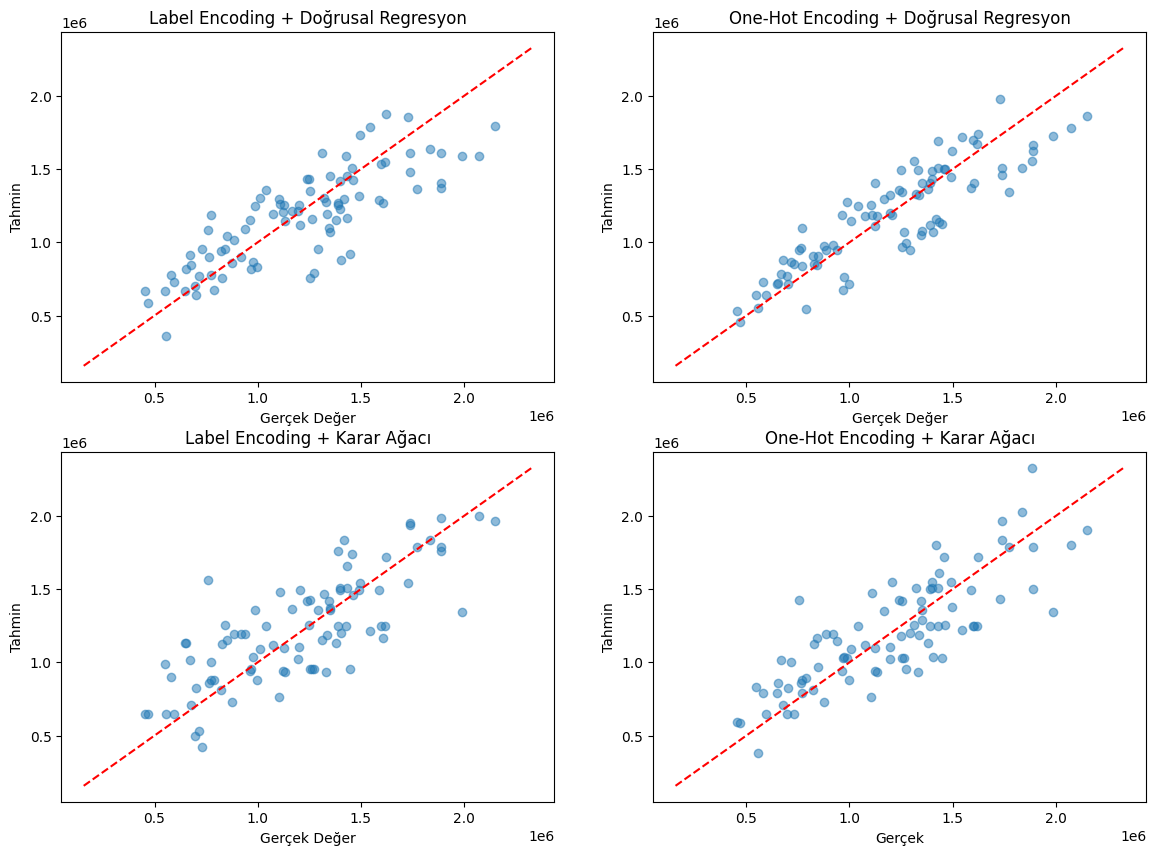

In [97]:
#Tahmin karşıkastırması grafiği
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.scatter(y_label_test,lr_label_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],"r--")
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin")
plt.title("Label Encoding + Doğrusal Regresyon")

plt.subplot(2,2,2)
plt.scatter(y_onehot_test,lr_onehot_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],"r--")
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin")
plt.title("One-Hot Encoding + Doğrusal Regresyon")

plt.subplot(2,2,3)
plt.scatter(y_label_test,dt_label_predict,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],"r--")
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin")
plt.title("Label Encoding + Karar Ağacı")

plt.subplot(2,2,4)
plt.scatter(y_onehot_test,dt_onehot_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],"--r")
plt.xlabel("Gerçek")
plt.ylabel("Tahmin")
plt.title("One-Hot Encoding + Karar Ağacı")
plt.show()

In [98]:
#Analiz
print("===Analiz Sonuçları===")
print("1. Doğrusal Regresyon")
print(f"Label Encoding RMSE: {lr_label_rmse:.2f}")
print(f"One-Hot Encoding RMSE: {lr_onehot_rmse:.2f}")
print(f"İyileşme Yüzde: {(lr_label_rmse-lr_onehot_rmse)/lr_label_rmse*100:.2f} ")

print("=="*31)
print("2. Karar Ağacı")
print(f"Label Encoding RMSE: {dt_label_rmse:.2f}")
print(f"One-Hot Encoding RMSE: {dt_onehot_rmse:.2f}")
print(f"İyileşme Yüzde : {(dt_label_rmse-dt_onehot_rmse)/dt_label_rmse* 100:.2f}")

===Analiz Sonuçları===
1. Doğrusal Regresyon
Label Encoding RMSE: 230764.39
One-Hot Encoding RMSE: 190675.10
İyileşme Yüzde: 17.37 
2. Karar Ağacı
Label Encoding RMSE: 254542.26
One-Hot Encoding RMSE: 233046.33
İyileşme Yüzde : 8.44


## Genel Olarak
- Doğrusal modeller(Doğrusal Regresyon,LR,SVM gibi) için sırasız kategorik değişkenlerde One-Hot Encoding tercih edilmelidir
- Ağaç tabanlı modeller (DT,RF,XGboost gibi) için her iki yöntem de işe yarayabilir , ancak One-Hot Encoding daha fazla bilgi sağladığından genellikle tercih edilir
- Sıralı kategorik değişkenlerde (zemin_deprem_durumu gibi) her iki modelde de  Label Encoding kullanılır